In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit, LinearRegression, Lasso, ElasticNet 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('../inputs/UK_used_cars.csv')

In [4]:
df.shape

(78817, 10)

In [5]:
df.isna().sum()

make            0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.head()

,make,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,78817.000000,78817.000000,78817.000000,78817.000000,78817.000000,78817.000000
mean,2017.139094,18278.230750,22999.972468,121.024145,55.121715,1.722249
std,2.117675,10298.171404,21489.146756,63.098020,16.775949,0.591508
min,1970.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,11000.000000,6865.000000,125.000000,47.100000,1.200000
50%,2017.000000,16012.000000,17114.000000,145.000000,55.400000,1.600000
75%,2019.000000,22594.000000,32500.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [8]:
for col in df.columns:
    print(df[col].value_counts())

ford       17965
vw         15157
merc       13119
bmw        10781
audi       10668
skoda       6267
hyundai     4860
Name: make, dtype: int64
 Fiesta             6557
 Golf               4863
 Focus              4588
 C Class            3747
 Polo               3287
                    ... 
 RS7                   1
 Transit Tourneo       1
 Escort                1
 Ranger                1
200                    1
Name: model, Length: 155, dtype: int64
2019    22298
2017    16589
2016    12351
2018    10563
2015     6050
2020     3907
2014     3192
2013     2077
2012      495
2011      320
2010      254
2009      211
2008      154
2007      116
2006       64
2005       49
2004       38
2003       23
2002       22
2001       17
2000        8
1998        7
1999        5
1997        3
1996        2
2060        1
1970        1
Name: year, dtype: int64
9995     346
12995    306
14995    304
11000    302
19995    301
        ... 
6897       1
13897      1
9597       1
9497       1
1590     

In [9]:
#droping the model feature
df.drop(['model'], axis=1, inplace=True)

In [10]:
df_dummies = pd.get_dummies(df[['make','transmission', 'fuelType']])

In [11]:
df.columns

Index(['make', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [12]:
a = df[['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']]
df_final = pd.concat([a, df_dummies], axis=1)

In [13]:
df_final.shape

(78817, 22)

In [14]:
df_final.head(2)

,year,price,mileage,tax,mpg,engineSize,make_audi,make_bmw,make_ford,make_hyundai,...,make_vw,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [15]:
# for col in ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     IQR = q3-q1
#     min_Value = q1-1.5*IQR
#     max_Value = q3+1.5*IQR

#     outliers = []
#     for i in df[col]:
#         #print(i)
#         if i< min_Value or i>max_Value:
#             outliers.append(i)
#     print(f"Outliers in {col}:",outliers)

In [16]:
datetime.datetime.now().year

2023

In [17]:
df_final['vehicleAge'] = datetime.datetime.now().year - df_final['year']

In [18]:
df_final[['year', 'vehicleAge']].head()

,year,vehicleAge
0,2017,6
1,2016,7
2,2016,7
3,2017,6
4,2019,4


## Distribution 

C:\Users\nitee\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


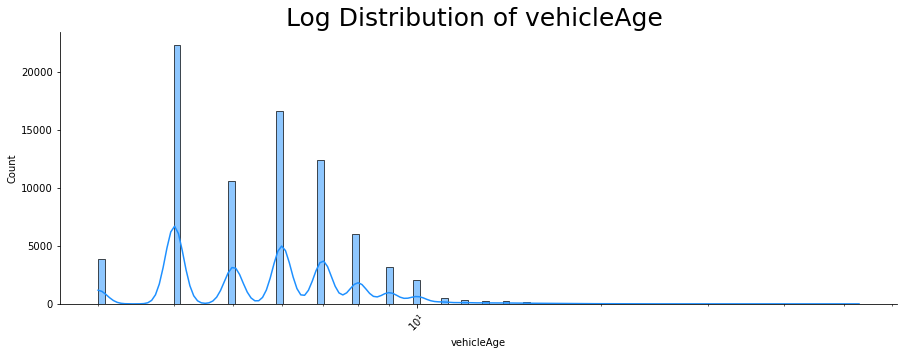

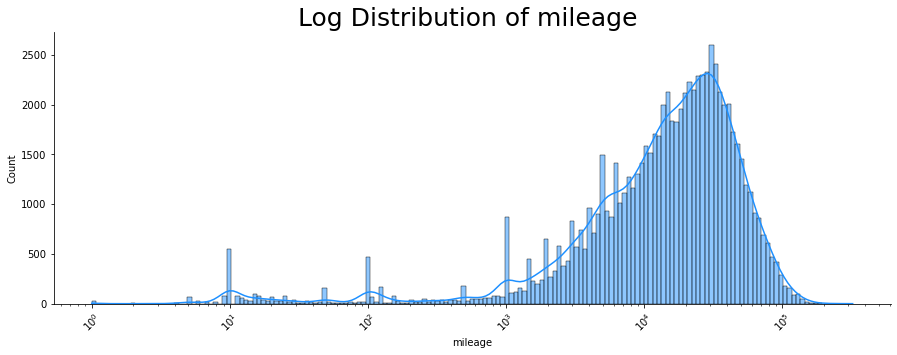

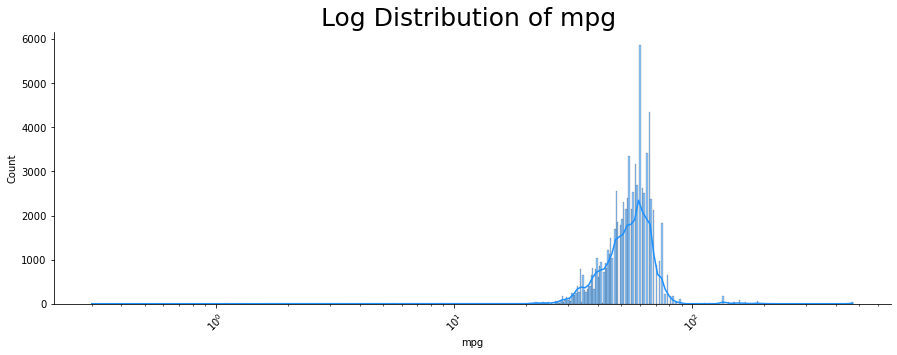

In [19]:
plot_cols = ['vehicleAge', 'mileage', 'mpg']
for col in plot_cols:
    plt.figure(figsize=(15,5))
    sns.histplot(data = df, x = df_final[col], color = 'dodgerblue', kde = True, log_scale=True)
    plt.title(f"Log Distribution of {col} ",fontsize = 25)
    sns.despine()
    plt.xticks(rotation=45)
    plt.show()

## Correlation

<AxesSubplot:>

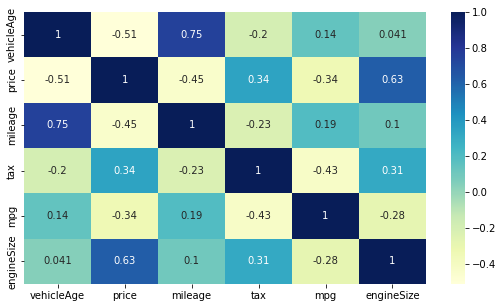

In [20]:
plt.figure(figsize=(9,5))
corr_df = df_final[['vehicleAge', 'price', 'mileage', 'tax', 'mpg', 'engineSize']]
corr = sns.heatmap(corr_df.corr(),annot=True,cmap="YlGnBu")
corr

## Multicolinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
X_variables = df_final[['vehicleAge', 'mileage', 'tax', 'mpg', 'engineSize']]

In [29]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [30]:
vif_data

,feature,VIF
0,vehicleAge,15.095292
1,mileage,4.618273
2,tax,5.102118
3,mpg,7.025307
4,engineSize,8.778867


In [59]:
df_final.drop(['year'], axis=1, inplace=True)

## Scaling

In [26]:
# scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = scaler.fit_transform(df_final)
data=pd.DataFrame(data, columns=df_final.columns)
data.head()

,price,mileage,tax,mpg,engineSize,make_audi,make_bmw,make_ford,make_hyundai,make_merc,...,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,vehicleAge
0,-0.561096,-0.338079,0.459223,0.016588,-0.544796,2.527483,-0.398071,-0.543346,-0.256347,-0.446863,...,-0.508937,0.969248,-0.007965,-0.621437,-0.955164,-0.007965,-0.11524,-0.042334,0.984202,0.065683
1,-0.172676,0.614408,-1.601077,0.541152,0.469567,2.527483,-0.398071,-0.543346,-0.256347,-0.446863,...,1.964878,-1.031727,-0.007965,-0.621437,1.046941,-0.007965,-0.11524,-0.042334,-1.016052,0.537902
2,-0.706754,0.323236,-1.442592,0.016588,-0.544796,2.527483,-0.398071,-0.543346,-0.256347,-0.446863,...,-0.508937,0.969248,-0.007965,-0.621437,-0.955164,-0.007965,-0.11524,-0.042334,0.984202,0.537902
3,-0.143544,0.137374,0.379980,0.725942,0.469567,2.527483,-0.398071,-0.543346,-0.256347,-0.446863,...,1.964878,-1.031727,-0.007965,-0.621437,1.046941,-0.007965,-0.11524,-0.042334,-1.016052,0.065683
4,-0.094991,-0.977335,0.379980,-0.329147,-1.221038,2.527483,-0.398071,-0.543346,-0.256347,-0.446863,...,-0.508937,0.969248,-0.007965,-0.621437,-0.955164,-0.007965,-0.11524,-0.042334,0.984202,-0.878755


## Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns='price'), 
                                                    df_final[['price']],
                                                    test_size=0.2,
                                                   random_state=1)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(63053, 21) (15764, 21) (63053, 1) (15764, 1)


In [34]:
X_train.head(2)

,mileage,tax,mpg,engineSize,make_audi,make_bmw,make_ford,make_hyundai,make_merc,make_skoda,...,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,vehicleAge
75369,6310,145,35.3,2.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,4
16524,9214,145,52.3,2.0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,4


## Modelling - Linear Regression

In [42]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(f'R^2 Value: %.2f' % LR.score(X_test,y_test))
print(f"Mean squared error: %.2f" % mean_squared_error(y_test, LR.predict(X_test)))

R^2 Value: 0.77
Mean squared error: 25375989.05


In [30]:
residuals = y_test - y_pred

<AxesSubplot:xlabel='price'>

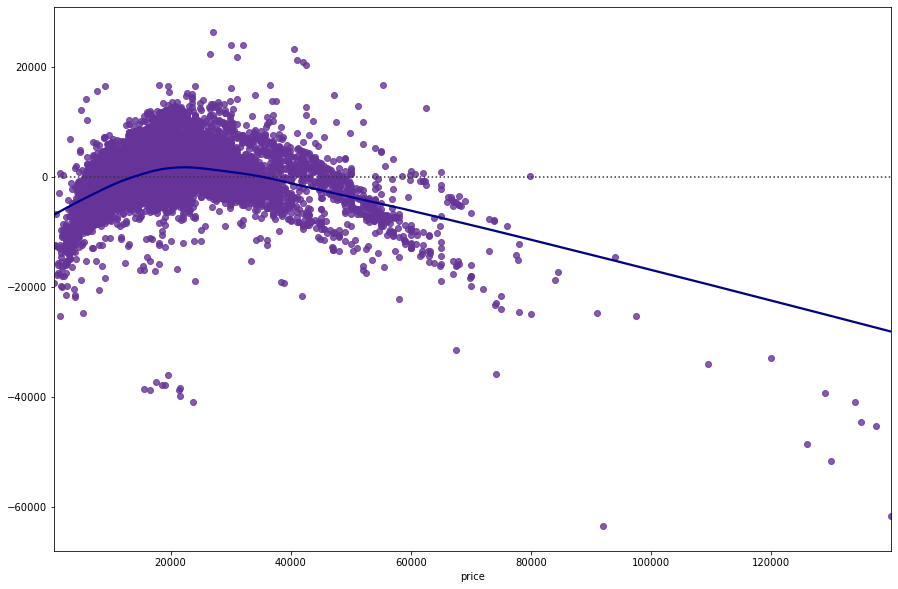

In [31]:
plt.figure(figsize=(15, 10))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws=dict(color="darkblue"), 
              color = 'rebeccapurple',)

In [40]:
def error(message, y_true, y_pred):
    print(message)
    print(mean_absolute_error(y_true, y_pred))
    print(mean_absolute_percentage_error(y_true, y_pred))

Error:
3133.0730438980136
0.2105251933585191


In [43]:
error('Error:', y_test, y_pred)

Error:
3132.6849256891946
0.2104939202641458


## Modelling - XGBoost Regressor

In [52]:
xgb = XGBRegressor(max_depth=7)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [53]:
print(f'R^2 Value: %.2f' % xgb.score(X_test,y_test))
print(f"Mean squared error: %.2f" % mean_squared_error(y_test, xgb.predict(X_test)))
print(f"Mean absolute error: %.2f" % mean_absolute_error(y_test, xgb.predict(X_test)))

R^2 Value: 0.94
Mean squared error: 6094654.44
Mean absolute error: 1510.48


In [35]:
error('Error:', y_test, y_pred)

Error:
1510.4750010798468
0.08931751815948748


In [36]:
print(f'R^2 Value: %.2f' % xgb.score(X_train,y_train))
print(f"Mean squared error: %.2f" % mean_squared_error(y_train, xgb.predict(X_train)))
print(f"Mean absolute error: %.2f" % mean_absolute_error(y_train, xgb.predict(X_train)))

R^2 Value: 0.97
Mean squared error: 3628730.76
Mean absolute error: 1295.04


## Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [57]:
y_pred=ridge_reg.predict(X_test)

In [58]:
error('Error:', y_test, y_pred)

Error:
3132.897135999385
0.2105109980124765


## SHAP

In [50]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [54]:
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_train)

# clust = shap.utils.hclust(X, y, linkage="single")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [55]:
shap_values0 = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values0[1, :], X_test.iloc[1, :])

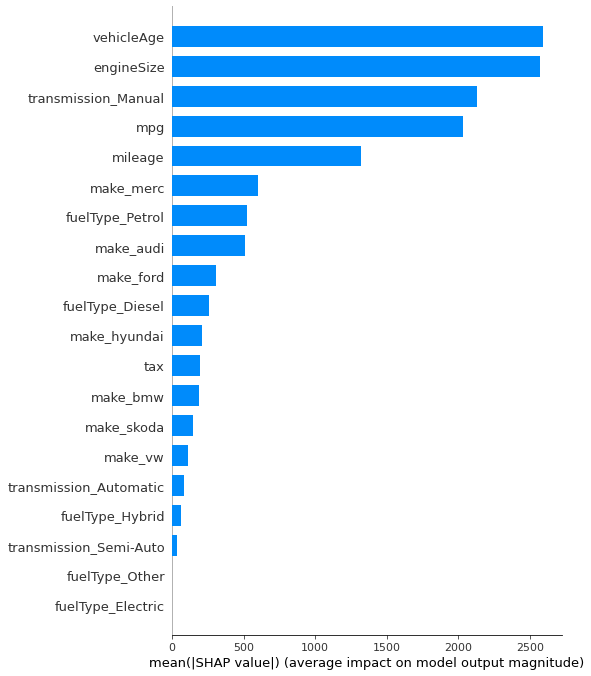

In [47]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

## PCA

In [113]:
# !pip install yellowbrick

In [115]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [203]:
# model = KMeans()
# visualizer = KElbowVisualizer(model,k=(1,10),timings=False)
# visualizer.fit(X_train)
# visualizer.show()

In [347]:
inputs = [col for col in df_train1.columns if col != 'Left']
X = df_train1[inputs]
y = df_train1[['Left']]

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca.shape

(1474, 3)

In [293]:
pca.explained_variance_ratio_

array([0.477318  , 0.23235591, 0.1389292 , 0.05307088, 0.0475272 ,
       0.02093233])

In [294]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.25, random_state=50, stratify=y)